## Importing Libraries
---

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import AdaBoostRegressor

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

import seaborn as sns
import matplotlib.pyplot as plt
import plotly_express as px

import os
import json
import pickle
import warnings
warnings.filterwarnings('ignore')

## Data Gathering
---

In [2]:
path = r"Dataset\car_data.csv"
df = pd.read_csv(path)

In [3]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


## Preprocessing
---
Now, Checking the `unique values` of features using `df['Column'].unique()`

In [4]:
print(df['Car_Name'].unique())

print('-' * 100)

print(df['Year'].unique())

print('-' * 100)

print(df['Driven_kms'].unique())

print('-' * 100)

print(df['Fuel_Type'].unique())

print('-' * 100)

print(df['Selling_type'].unique())

print('-' * 100)

print(df['Transmission'].unique())

print('-' * 100)

print(df['Owner'].unique())

print('-' * 100)



['ritz' 'sx4' 'ciaz' 'wagon r' 'swift' 'vitara brezza' 's cross'
 'alto 800' 'ertiga' 'dzire' 'alto k10' 'ignis' '800' 'baleno' 'omni'
 'fortuner' 'innova' 'corolla altis' 'etios cross' 'etios g' 'etios liva'
 'corolla' 'etios gd' 'camry' 'land cruiser' 'Royal Enfield Thunder 500'
 'UM Renegade Mojave' 'KTM RC200' 'Bajaj Dominar 400'
 'Royal Enfield Classic 350' 'KTM RC390' 'Hyosung GT250R'
 'Royal Enfield Thunder 350' 'KTM 390 Duke ' 'Mahindra Mojo XT300'
 'Bajaj Pulsar RS200' 'Royal Enfield Bullet 350'
 'Royal Enfield Classic 500' 'Bajaj Avenger 220' 'Bajaj Avenger 150'
 'Honda CB Hornet 160R' 'Yamaha FZ S V 2.0' 'Yamaha FZ 16'
 'TVS Apache RTR 160' 'Bajaj Pulsar 150' 'Honda CBR 150' 'Hero Extreme'
 'Bajaj Avenger 220 dtsi' 'Bajaj Avenger 150 street' 'Yamaha FZ  v 2.0'
 'Bajaj Pulsar  NS 200' 'Bajaj Pulsar 220 F' 'TVS Apache RTR 180'
 'Hero Passion X pro' 'Bajaj Pulsar NS 200' 'Yamaha Fazer '
 'Honda Activa 4G' 'TVS Sport ' 'Honda Dream Yuga '
 'Bajaj Avenger Street 220' 'Hero Splend

- Looking at the records, the dataset has `Cars` and `Bikes` in its records. We should make a categorical feature `Type` describing the type of vehicle.
- Also, we need to rename few records which are miss-spelled.

In [5]:
df['Car_Name'].replace({'800' : 'alto 800'} , inplace = True)

Based on domain knowledge, we have to segregate `bikes` and `cars` from the dataset.

In [6]:
def feature_type(data : pd.DataFrame = None):    
    
    bikes = ['Royal Enfield Thunder 500', 'UM Renegade Mojave', 'KTM RC200', 'Bajaj Dominar 400',
     'Royal Enfield Classic 350', 'KTM RC390', 'Hyosung GT250R',
     'Royal Enfield Thunder 350', 'KTM 390 Duke', 'Mahindra Mojo XT300',
     'Bajaj Pulsar RS200', 'Royal Enfield Bullet 350',
     'Royal Enfield Classic 500', 'Bajaj Avenger 220', 'Bajaj Avenger 150',
     'Honda CB Hornet 160R', 'Yamaha FZ S V 2.0', 'Yamaha FZ 16',
     'TVS Apache RTR 160', 'Bajaj Pulsar 150', 'Honda CBR 150', 'Hero Extreme',
     'Bajaj Avenger 220 dtsi', 'Bajaj Avenger 150 street', 'Yamaha FZ  v 2.0',
     'Bajaj Pulsar  NS 200', 'Bajaj Pulsar 220 F', 'TVS Apache RTR 180',
     'Hero Passion X pro', 'Bajaj Pulsar NS 200', 'Yamaha Fazer',
     'Honda Activa 4G', 'TVS Sport', 'Honda Dream Yuga',
     'Bajaj Avenger Street 220', 'Hero Splender iSmart', 'Activa 3g',
     'Hero Passion Pro', 'Honda CB Trigger', 'Yamaha FZ S',
     'Bajaj Pulsar 135 LS', 'Activa 4g', 'Honda CB Unicorn',
     'Hero Honda CBZ extreme', 'Honda Karizma', 'Honda Activa 125', 'TVS Jupyter',
     'Hero Honda Passion Pro', 'Hero Splender Plus', 'Honda CB Shine',
     'Bajaj Discover 100', 'Suzuki Access 125', 'TVS Wego', 'Honda CB twister',
     'Hero Glamour', 'Hero Super Splendor', 'Bajaj Discover 125', 'Hero Hunk',
     'Hero  Ignitor Disc', 'Hero  CBZ Xtreme', 'Bajaj  ct 100']


    cars = ['ritz', 'sx4', 'ciaz', 'wagon r', 'swift', 'vitara brezza', 's cross',
     'alto 800', 'ertiga', 'dzire', 'alto k10', 'ignis', 'baleno', 'omni',
     'fortuner', 'innova', 'corolla altis', 'etios cross', 'etios g', 'etios liva',
     'corolla', 'etios gd', 'camry', 'land cruiser','i20', 'grand i10',
     'i10', 'eon', 'xcent', 'elantra', 'creta', 'verna', 'city', 'brio', 'amaze', 'jazz']

    # Creating new feature 'Type' in dataframe with 'Null' as initial value
    df['Type'] = np.nan

    for value in df['Car_Name']:    

        if value.strip() in cars:

            df['Type'].loc[np.where(df['Car_Name'] == value)] = 'Car'

        elif value.strip() in bikes:

            df['Type'].loc[np.where(df['Car_Name'] == value)] = 'Bike'
            
    return data
    

In [7]:
df = feature_type(df)
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,Type
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,Car
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,Car
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,Car
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,Car
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,Car


Current year is `2023`. We might be interested in `Number of years` the vehicle has been used. We can achieve these using 
`df['Used_Years'] = 2023 - df['Year']`

In [8]:
def create_feature_used_year(data : pd.DataFrame = None, current_year : int = None):
    
    data['Used_Years'] = current_year - data['Year']
    
    return data

In [9]:
df = create_feature_used_year(df, current_year = 2023)
df

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,Type,Used_Years
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,Car,9
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,Car,10
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,Car,6
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,Car,12
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,Car,9
...,...,...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0,Car,7
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0,Car,8
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0,Car,14
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0,Car,6


### Handling Missing Values

Let's check for `Null Values` in our dataframe using `df.isna()`

In [10]:
df.isna().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
Type             0
Used_Years       0
dtype: int64

### Statistics

In [11]:
df.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner,Used_Years
count,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189,9.372093
std,2.891554,5.082812,8.642584,38886.883882,0.247915,2.891554
min,2003.000000,0.100000,0.320000,500.000000,0.000000,5.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000,7.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000,9.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000,11.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000,20.000000


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
 9   Type           301 non-null    object 
 10  Used_Years     301 non-null    int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 26.0+ KB


## Exploratory Data Analysis
---

In [13]:
def plot_continuous_distribution(data: pd.DataFrame = None, column: str = None, height: int = 5):
    
    _ = sns.displot(data, x=column, kde=True, height=height, aspect=height/5).set(title=f'Distribution of {column}')
    plt.show()  

    
    
    
def plot_categorical_distribution(data: pd.DataFrame = None, column: str = None, height: int = 8, aspect: int = 2):
    
    _ = sns.catplot(data=data, x=column, kind='count', height=height, aspect=aspect).set(title=f'Distribution of {column}')
    
    plt.xticks(rotation = 90)
    
    plt.show()
    
    
    
def plot_crosstab(data: pd.DataFrame = None, column_1: str = None, column_2: str = None, size: tuple = (10,8)):

    ct = pd.crosstab(data[column_1],data[column_2])

    ct.div(ct.sum(1).astype(float), axis = 0).plot(kind='bar', stacked=True, figsize=size)

    plt.xlabel(f'{column_1}')

    plt.ylabel('Percentage')
    
    plt.show()
    
    
    
def correlation_plot(data: pd.DataFrame = None, numeric_only: bool = True, width: int = 10, height: int = 5,
                     method: str = 'pearson'):
    
    ''' 
    Methods can be : 'pearson', 'kendall', 'spearman'
    
    '''
    
    corr = data.corr(method = method, numeric_only = numeric_only)
    
    mask_ = np.array(corr)
    mask_[np.tril_indices_from(mask_)] = False

    fig , ax = plt.subplots()
    fig.set_size_inches(width,height)
    sns.heatmap(corr , mask = mask_ , vmax = 0.8 , square = True , annot = True , cmap = "YlGnBu")
    plt.show()

---

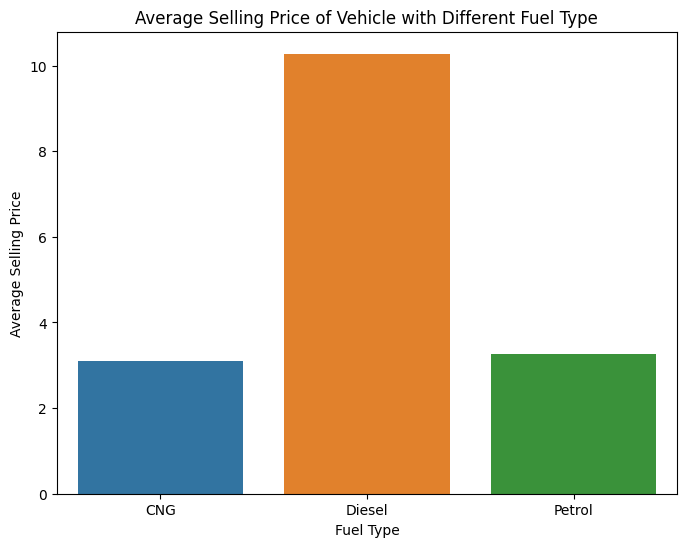

In [14]:
sp_df = df.groupby('Fuel_Type')['Selling_Price'].mean()

# Plotting the average selling price with respect to fuel type
plt.figure(figsize=(8, 6))

sns.barplot(x = sp_df.index, y = sp_df.values)

plt.title('Average Selling Price of Vehicle with Different Fuel Type')

plt.xlabel('Fuel Type')

plt.ylabel('Average Selling Price')

plt.show()

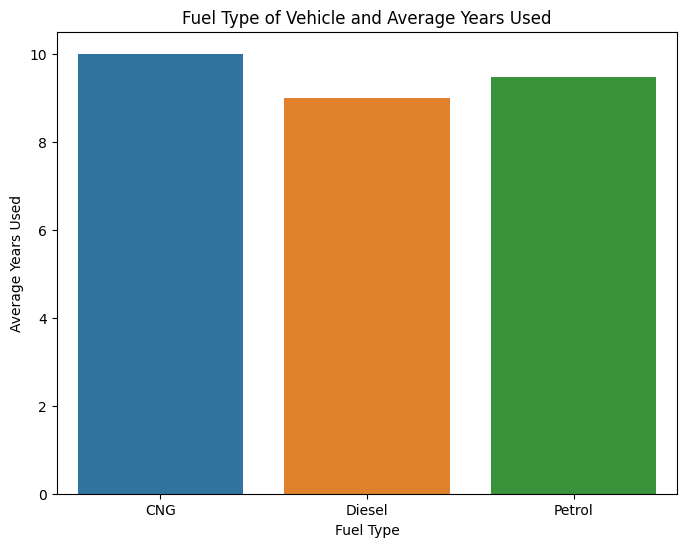

In [15]:
ft_df = df.groupby('Fuel_Type')['Used_Years'].mean()

# Plotting the average of used years with respect to type of vehicle
plt.figure(figsize=(8, 6))

sns.barplot(x = ft_df.index, y = ft_df.values)

plt.title('Fuel Type of Vehicle and Average Years Used')

plt.xlabel('Fuel Type')

plt.ylabel('Average Years Used')

plt.show()

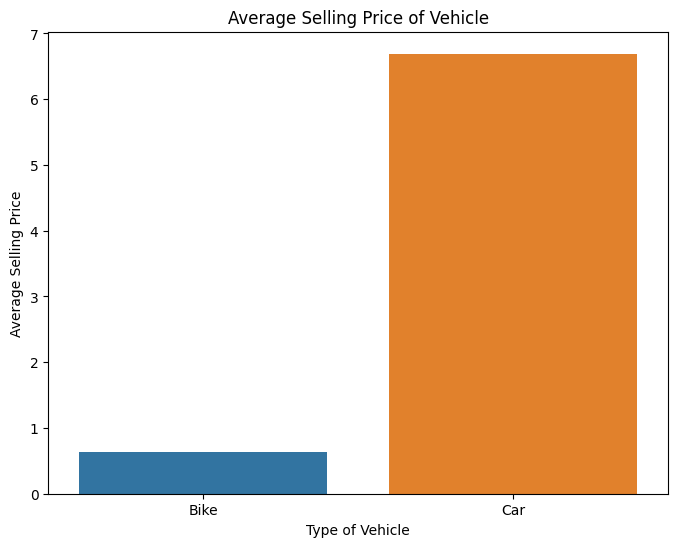

In [16]:
spt_df = df.groupby('Type')['Selling_Price'].mean()

# Plotting the average selling price with respect to type of vehice
plt.figure(figsize=(8, 6))

sns.barplot(x = spt_df.index, y = spt_df.values)

plt.title('Average Selling Price of Vehicle')

plt.xlabel('Type of Vehicle')

plt.ylabel('Average Selling Price')

plt.show()

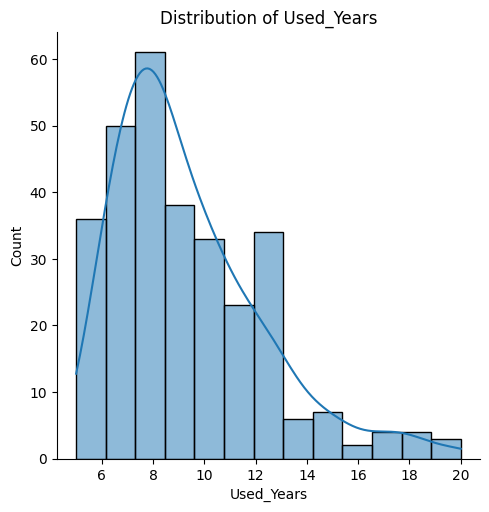

In [17]:
plot_continuous_distribution(df , 'Used_Years')

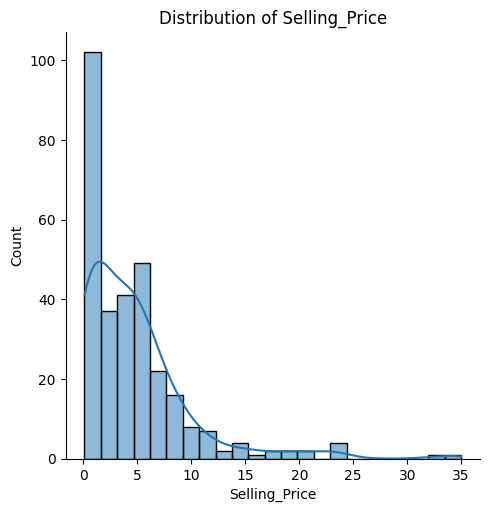

In [18]:
plot_continuous_distribution(df , 'Selling_Price')

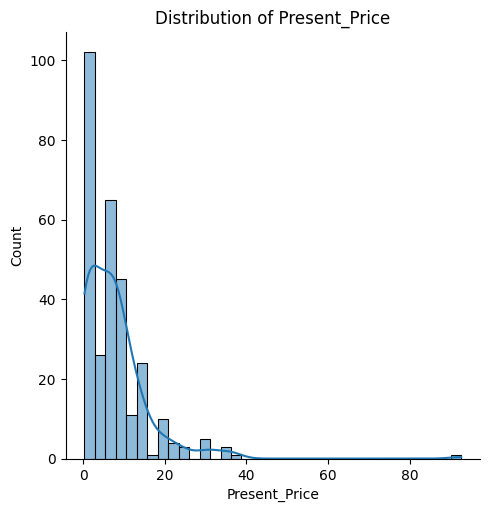

In [19]:
plot_continuous_distribution(df , 'Present_Price')

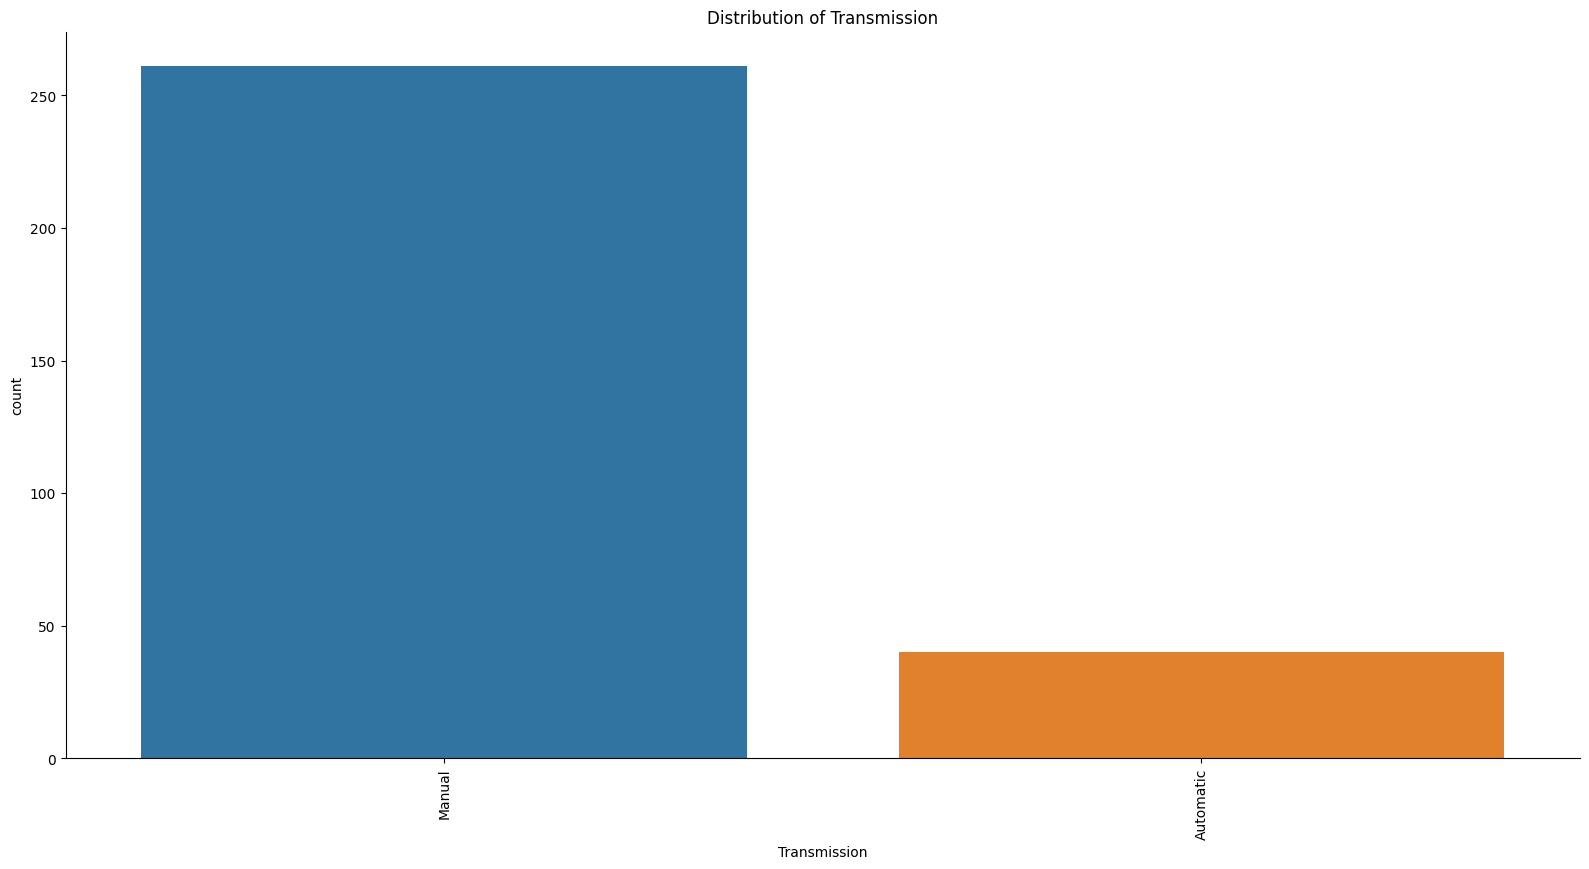

In [20]:
plot_categorical_distribution(df , 'Transmission')

## Conclusion
---

- Majority of poeple prefer `Manual` transmission over `Automatic` Transmission
- Average selling price of a `Car` is approximately `Rs 680K` while that of `Bike` is `Rs 85K`
- `Diesel` Vehicles are most likely to have maximum selling price of about `Rs 1 M` followed by `Petrol` vehicles which is about `Rs 310 K` and then `CNG`
- `CNG` Type of Vehicles has highest `average used years`

## Feature Engineering
---

`Selling_Price` is our `Target Feature` i.e we have to predict that value

- Machine Learning Algorithms accepts only `Numeric Values`. Hence, we have to convert the `object` data type to `int` or `float`.
- We will be using `One Hot Encoding` method and `Label Encoding`.

In [21]:
def label_enconding(data : pd.DataFrame = None , label_data : dict = None):
        
        '''
        Convert categorical variable indicator variables.

        Each variable is converted in as values passed as dictionary.
        Columns in the output remains same with change in their values from
        `object` to or `int`
        
        Args
        -----
        
            data_frame (pd.DataFrame): The DataFrame containing the data.
            label_data (dict): Column name(s) to be encoded
               
        Returns
        --------
        
            pd.DataFrame: A new DataFrame with the label encoded columns.
        
        '''
           
        for col, val in label_data.items():

            data[col].replace(val , inplace = True)

        return data
        

In [22]:
label_data = {'Selling_type' : {'Dealer' : 0 , 'Individual' : 1} , 
              'Transmission' : {'Manual' : 0 , 'Automatic' : 1} ,
              'Type' : {'Car' : 0 , 'Bike' : 1}}

We will need this label data while testing our model. Hence we will have to save this file using `json`

In [23]:
data_path = r'Task_3_Model_Files\label_data.json'

if not os.path.exists(data_path):

    with open(data_path , 'w') as f:

        json.dump(label_data , f)

In [24]:
df = label_enconding(df , label_data)

In [25]:
df = pd.get_dummies(df , columns = ['Fuel_Type'] , dtype = int)
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Selling_type,Transmission,Owner,Type,Used_Years,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol
0,ritz,2014,3.35,5.59,27000,0,0,0,0,9,0,0,1
1,sx4,2013,4.75,9.54,43000,0,0,0,0,10,0,1,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0,6,0,0,1
3,wagon r,2011,2.85,4.15,5200,0,0,0,0,12,0,0,1
4,swift,2014,4.60,6.87,42450,0,0,0,0,9,0,1,0


`Car_Name` and `Present_Price` does not look important as there are only unique values in these columns, which would have no impact on our model.
Hence, it should be dropped using `df.drop(columns = ['Column_Name'] , inplace = True)`

In [26]:
df.drop(columns = ['Car_Name' , 'Present_Price'] , inplace = True)

### Checking Correlation
---

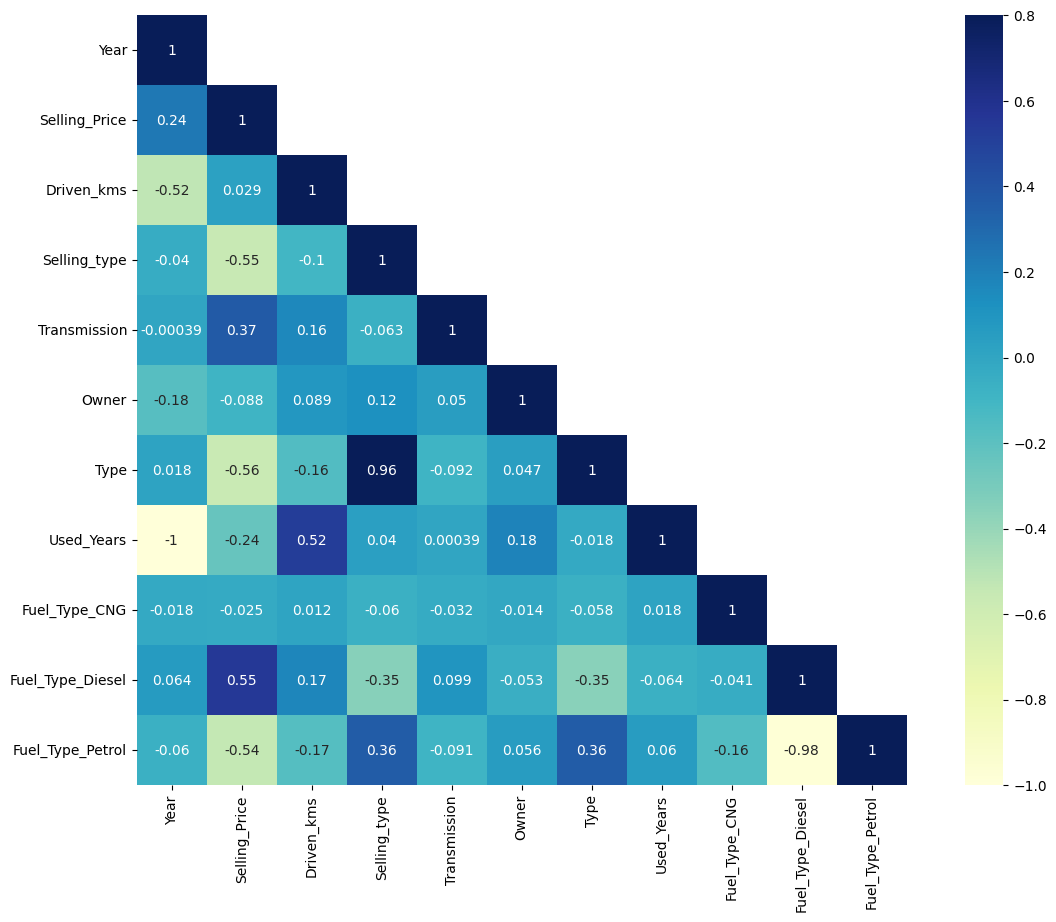

In [27]:
correlation_plot(df , method = 'pearson' , width = 15 , height = 10,)

## Feature Scaling
---

Before we perform `Scaling`, we shall separate our target column from rest dataframe

In [28]:
X = df.drop('Selling_Price' , axis = 1)
Y = df['Selling_Price']

In [29]:
scaler = MinMaxScaler()

arr = scaler.fit_transform(X)

X_S = pd.DataFrame(arr , columns = X.columns)

We will need to save scaling model

In [30]:
scaler_path = r'Task_3_Model_Files\min_scaler.pickle'

if not os.path.exists(scaler_path):

    with open(scaler_path , 'wb') as f:

        pickle.dump(scaler , f)

## Model Building
---

In [31]:
x_train , x_test , y_train , y_test = train_test_split(X_S , Y , train_size = 0.75 , random_state = 5)

In [32]:
ad_model = AdaBoostRegressor(random_state = 6)
ad_model.fit(x_train , y_train)

AdaBoostRegressor(random_state=6)

##### Accuracy of `AdaBoostRegressor` Model on Training Dataset
---

In [33]:
y_pred_train = ad_model.predict(x_train)

accuracy = r2_score(y_train , y_pred_train)

mae = mean_absolute_error(y_train , y_pred_train)

mse = mean_squared_error(y_train , y_pred_train)

print('-' * 100)

print(f'Accuracy Of Model On Training Data Is: {accuracy}')

print('-' * 100)

print(f'Mean Absolute Error Of Model On Training Data : {mae}')

print('-' * 100)

print(f'Mean Squared Error Of Model On Training Data : {mse}')

print('-' * 100)

----------------------------------------------------------------------------------------------------
Accuracy Of Model On Training Data Is: 0.8088996222649389
----------------------------------------------------------------------------------------------------
Mean Absolute Error Of Model On Training Data : 1.696408450577013
----------------------------------------------------------------------------------------------------
Mean Squared Error Of Model On Training Data : 5.057082311071781
----------------------------------------------------------------------------------------------------


##### Accuracy of `AdaBoostRegressor` Model on Testing Dataset
---

In [34]:
y_pred = ad_model.predict(x_test)

accuracy = r2_score(y_test , y_pred)

mae = mean_absolute_error(y_test , y_pred)

mse = mean_squared_error(y_test , y_pred)

print('-' * 100)

print(f'Accuracy Of Model On Testing Data Is: {accuracy}')

print('-' * 100)

print(f'Mean Absolute Error Of Model On Testing Data : {mae}')

print('-' * 100)

print(f'Mean Squared Error Of Model On Testing Data : {mse}')

print('-' * 100)

----------------------------------------------------------------------------------------------------
Accuracy Of Model On Testing Data Is: -1.106656839588458
----------------------------------------------------------------------------------------------------
Mean Absolute Error Of Model On Testing Data : 3.2221591846797937
----------------------------------------------------------------------------------------------------
Mean Squared Error Of Model On Testing Data : 49.68254436403877
----------------------------------------------------------------------------------------------------


We will be Hypertuning our model to improve it's accuracy

In [35]:
hyper_parameters = {'n_estimators' : np.arange(30 , 350), 
                    'learning_rate' : np.arange(0.1 , 1.0 , 0.1),
                    'loss' : ['linear', 'square', 'exponential']
                   }

gscv_ad = GridSearchCV(ad_model, hyper_parameters, cv = 7, n_jobs = -1)

gscv_ad.fit(x_train , y_train)

GridSearchCV(cv=7, estimator=AdaBoostRegressor(random_state=6), n_jobs=-1,
             param_grid={'learning_rate': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                         'loss': ['linear', 'square', 'exponential'],
                         'n_estimators': array([ 30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,  42,
        43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,  55,
        56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,
        69,  70,  71,  72,  73,  74,  75,  76,  7...
       251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263,
       264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276,
       277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289,
       290, 291, 292, 293, 294, 295, 296, 297, 298, 299, 300, 301, 302,
       303, 304, 305, 306, 307, 308, 309, 310, 311, 312, 313, 314, 315,
       316, 317, 318, 319, 320, 321, 322, 323, 324, 325, 326, 327, 328,
       329, 330, 331, 332, 333, 334, 335, 336, 337, 338, 339, 340, 341,
       342, 343, 344, 345, 346, 347, 348, 349])})

In [36]:
ad_reg = gscv_ad.best_estimator_
ad_reg.fit(x_train , y_train)

AdaBoostRegressor(learning_rate=0.1, loss='exponential', n_estimators=34,
                  random_state=6)

---
##### Accuracy of `Hypertuned AdaBoostRegressor` Model on Training Dataset
---

In [37]:
y_pred_train = ad_reg.predict(x_train)

accuracy = r2_score(y_train , y_pred_train)

mae = mean_absolute_error(y_train , y_pred_train)

mse = mean_squared_error(y_train , y_pred_train)

print('-' * 100)

print(f'Accuracy Of Model On Training Data Is: {accuracy}')

print('-' * 100)

print(f'Mean Absolute Error Of Model On Training Data : {mae}')

print('-' * 100)

print(f'Mean Squared Error Of Model On Training Data : {mse}')

print('-' * 100)

----------------------------------------------------------------------------------------------------
Accuracy Of Model On Training Data Is: 0.8504864203355409
----------------------------------------------------------------------------------------------------
Mean Absolute Error Of Model On Training Data : 1.3150202310284698
----------------------------------------------------------------------------------------------------
Mean Squared Error Of Model On Training Data : 3.956572393773117
----------------------------------------------------------------------------------------------------


---
##### Accuracy of `Hypertuned AdaBoostRegressor` Model on Testing Dataset
---

In [38]:
y_pred = ad_reg.predict(x_test)

accuracy = r2_score(y_test , y_pred)

mae = mean_absolute_error(y_test , y_pred)

mse = mean_squared_error(y_test , y_pred)

print('-' * 100)

print(f'Accuracy Of Model On Testing Data Is: {accuracy}')

print('-' * 100)

print(f'Mean Absolute Error Of Model On Testing Data : {mae}')

print('-' * 100)

print(f'Mean Squared Error Of Model On Testing Data : {mse}')

print('-' * 100)

----------------------------------------------------------------------------------------------------
Accuracy Of Model On Testing Data Is: -1.0509762586969122
----------------------------------------------------------------------------------------------------
Mean Absolute Error Of Model On Testing Data : 2.854708599312058
----------------------------------------------------------------------------------------------------
Mean Squared Error Of Model On Testing Data : 48.36939602474869
----------------------------------------------------------------------------------------------------


In [39]:
model_path = r'Task_3_Model_Files\model.pickle'

if not os.path.exists(model_path):

    with open(model_path , 'wb') as f:

        pickle.dump(ad_reg , f)

## Testing On New File